In [20]:
%config Completer.use_jedi = False

In [21]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import re

Question 2

```
(예제 : 네이버 영화 리뷰 분석)

inputs/selected_review의 데이터를 load 하여, 해당 리뷰를 아래와 같이 분석하라.

corpus는 리뷰 중 가장 많이 나온 단어 상위 20개를 사용하여 구성하라.
사랑이라는 단어와 가장 가까운 리뷰를 cosine similarity를 이용하여 상위 10개까지 구하라.
사랑이라는 단어와 가장 가까운 단어를 cosine similarity를 이용하여 상위 10개까지 구하라.
리뷰 중 가장 많이 나온 단어 상위 20개를 scatter 를 사용하여 plot 하라.
```

In [22]:
review  = pd.read_csv('ratings_train.txt', delimiter='\t')

In [23]:
love_review = review[review.document.str.contains('사랑')==True].head(100)
type_review = review[review.document.str.contains('장르')==True].head(100)

df = pd.concat([love_review, type_review], axis=0)

In [24]:
df.document

48                                    난 우리영화를 사랑합니다....^^;
64                          사랑하고싶게하는,가슴속온감정을헤집어놓는영화예요정말최고.
127      10년이 지나 다시 보게된 영화 .. 다시봐도 그 순수한 사랑에 감동 ㅠㅠ 숀펜의 ...
193       난 사랑비 서준에게 쏙 빠져버렸네. 1.2.3초만에 쏙ㅋㅋ난 절대잊지도않고후회도안할거야
198              넘 사랑스러운 영화다 ㅠㅠ 1보고 2 연이어 봤다~!! 넘 귀여워 ㅠㅠ♥♥
203      후세와 사랑하게된 결정적 계기 그시간이 표현되지 않았으며 시람의 생명을 빼앗아야만하...
212                                 각기 다른 사람들의 재밌고 멋진 사랑영화
242               감각적인..시각으로...바라보는..색다른...느낌의...사랑...문학적이
288      스토리도 말이 안되고 개막장 사랑이야기도 아니예요 이걸보고계신다면 당신의 시간과돈을...
405                       여운이 엄청~길게 남는영화.. 이이경을 사랑하게하는 영화!
413                             너무 사랑스럽고 감동적인 영화:) 정말 좋앗어요
452      이 영화의 3박자는 디테일이었다. (정말 시가전의 퀄리티는 완벽했고) 남자의 사랑에...
473      그만빙빙돌리고 밝혀지게하면안되나요 ?보려다아직도질질끌어짜증나.안봄 여기서또사고터져 ...
585                   사랑에 상처받으면 다시 치유될수 있을까? 하는 생각이 드는 영화!
682      잘봤어요 외모뿐만이 아니라 여러가지들을 따지며 사랑에 빠지는것이 아니라 '하려고' ...
716      일편에 비해 삽질하는 브리짓이 쪼~끔 짜증날 때도 있었지만 그래도 여전히 사랑스럽다...
741      이 영화를 보고 '사랑하고 싶다' 라는 생각을 했습니다. 청소년 관람불가임에도 선정.

In [25]:
import konlpy
from konlpy.tag import Komoran

komoran = Komoran()
documents = [komoran.nouns(elem) for elem in df.document.values]

In [26]:
documents[:5]

[['영화', '사랑합니다'],
 ['사랑', '가슴속', '온', '감정', '영화', '예', '요정', '말', '최고'],
 ['년', '영화', '순수', '사랑', '감동', '숀펜', '연기'],
 ['사랑비', '서주', '초', '절대', '후회', '도안', '할거'],
 ['넘', '사랑', '영화', '보고', '넘']]

In [27]:
import pickle

# 데이터를 파일로 저장하기
with open('selected_reviews', 'wb') as handle:
    pickle.dump(documents, handle)

In [28]:
# 데이터 불러오기
with open('selected_reviews', 'rb') as handle:
    loaded_doc = pickle.load(handle)

In [29]:
len(documents[:20])

20

In [30]:
from collections import Counter

In [31]:
total_documents = []
for doc in documents:
    for i in doc:
        total_documents.append(i)

In [32]:
total_documents

['영화',
 '사랑합니다',
 '사랑',
 '가슴속',
 '온',
 '감정',
 '영화',
 '예',
 '요정',
 '말',
 '최고',
 '년',
 '영화',
 '순수',
 '사랑',
 '감동',
 '숀펜',
 '연기',
 '사랑비',
 '서주',
 '초',
 '절대',
 '후회',
 '도안',
 '할거',
 '넘',
 '사랑',
 '영화',
 '보고',
 '넘',
 '후세',
 '사랑',
 '결정',
 '계기',
 '시간',
 '표현',
 '생명',
 '이유',
 '등',
 '시',
 '노',
 '출현',
 '연극',
 '으',
 '로',
 '생각',
 '시',
 '노',
 '시랑',
 '노력',
 '뻔',
 '사람',
 '사랑',
 '영화',
 '감각',
 '시각',
 '느낌',
 '사랑',
 '문학',
 '스토리',
 '말',
 '안',
 '개막',
 '장',
 '사랑',
 '이야기',
 '예',
 '시간',
 '과',
 '돈',
 '거',
 '예',
 '요',
 '휴',
 '호구',
 '여운',
 '영화',
 '이이경',
 '사랑',
 '영화',
 '사랑',
 '감동',
 '영화',
 '영화',
 '박자',
 '디테일',
 '시가전',
 '완벽',
 '남자',
 '사랑',
 '묘사',
 '작중',
 '한석규',
 '사랑',
 '마음',
 '디테일',
 '마지막',
 '얘기',
 '완급',
 '조절',
 '완벽',
 '영화',
 '짜증',
 '안',
 '봄',
 '진짜',
 '짜증',
 '날',
 '듯',
 '건',
 '반전',
 '작가',
 '드라마',
 '사랑',
 '넘',
 '짜증',
 '사랑',
 '상처',
 '치유',
 '수',
 '생각',
 '영화',
 '외모',
 '뿐',
 '가지',
 '사랑',
 '것',
 '요즘',
 '사람',
 '영화인',
 '거',
 '일편',
 '삽',
 '브리',
 '짓',
 '끔',
 '짜증',
 '날',
 '때',
 '콜린 퍼스',
 '휴 그랜트',
 '한자리',
 '것',
 '만',
 '점',
 '영화',

In [33]:
counted_dict = Counter(total_documents)

In [34]:
pre_corpus = counted_dict.most_common()[:20]

In [35]:
for cor in pre_corpus:
    for j in cor:
        print(j)

영화
105
사랑
94
장르
92
것
31
수
22
사람
18
액션
15
거
14
말
13
때
13
생각
12
드라마
12
스릴러
12
시간
11
코미디
11
평점
10
씨
10
연기
9
스토리
9
이야기
9


In [36]:
corpus = OrderedDict(
    {'영화':0,
     '사랑':1,
     '장르':2,
     '것':3,
     '수':4,
     '사람':5,
     "액션":6,
     '거':7,
     '말':8,
     '때':9,
     '생각':10,
     "드라마":11,
     '스릴러':12,
     '시간':13,
     '코미디':14,
     '평점':15,
     '씨':16,
     '연기':17,
     '스토리':18,
     '이야기':19,
})


In [37]:
corpus

OrderedDict([('영화', 0),
             ('사랑', 1),
             ('장르', 2),
             ('것', 3),
             ('수', 4),
             ('사람', 5),
             ('액션', 6),
             ('거', 7),
             ('말', 8),
             ('때', 9),
             ('생각', 10),
             ('드라마', 11),
             ('스릴러', 12),
             ('시간', 13),
             ('코미디', 14),
             ('평점', 15),
             ('씨', 16),
             ('연기', 17),
             ('스토리', 18),
             ('이야기', 19)])

doc word matrix? 200 x 20?

In [40]:
len(documents)

200

In [53]:
reviews = []
for i in df.iloc[:,1]:
    reviews.append(i)

In [55]:
reviews[0]

'난 우리영화를 사랑합니다....^^;'

### 리뷰 파싱

In [58]:
def parse_document(doc):
    tokens = doc.split(' ')
    tokens = map(str.lower, tokens)
    tokens = list(tokens)
    tokens = [re.sub(r'[^가-힣a-zA-Z0-9-]', '', token) for token in tokens]
    
    return tokens

In [59]:
parse_document(reviews[0])

['난', '우리영화를', '사랑합니다']

In [69]:
tokenized = []
for k in reviews:
     tokenized.append(parse_document(k))

In [70]:
tokenized

[['난', '우리영화를', '사랑합니다'],
 ['사랑하고싶게하는가슴속온감정을헤집어놓는영화예요정말최고'],
 ['10년이',
  '지나',
  '다시',
  '보게된',
  '영화',
  '',
  '다시봐도',
  '그',
  '순수한',
  '사랑에',
  '감동',
  '',
  '숀펜의',
  '연기또한',
  ''],
 ['난', '사랑비', '서준에게', '쏙', '빠져버렸네', '123초만에', '쏙난', '절대잊지도않고후회도안할거야'],
 ['넘', '사랑스러운', '영화다', '', '1보고', '2', '연이어', '봤다', '넘', '귀여워', ''],
 ['후세와',
  '사랑하게된',
  '결정적',
  '계기',
  '그시간이',
  '표현되지',
  '않았으며',
  '시람의',
  '생명을',
  '빼앗아야만하는이유등을',
  '시노가',
  '출현하는',
  '연극으',
  '로',
  '더',
  '알려주었으면',
  '하는',
  '생각이든다',
  '또한',
  '시노가',
  '얼마나',
  '본능을절제히면서',
  '시랑을',
  '하려고',
  '노력하는지를',
  '더',
  '보여줬다면',
  '좋았을뻔했다'],
 ['각기', '다른', '사람들의', '재밌고', '멋진', '사랑영화'],
 ['감각적인시각으로바라보는색다른느낌의사랑문학적이'],
 ['스토리도',
  '말이',
  '안되고',
  '개막장',
  '사랑이야기도',
  '아니예요',
  '이걸보고계신다면',
  '당신의',
  '시간과돈을',
  '아낀거예요휴',
  '그래도',
  '본다면',
  '호구'],
 ['여운이', '엄청길게', '남는영화', '이이경을', '사랑하게하는', '영화'],
 ['너무', '사랑스럽고', '감동적인', '영화', '정말', '좋앗어요'],
 ['이',
  '영화의',
  '3박자는',
  '디테일이었다',
  '정말',
  '시가전의',
  '퀄리티는',
  '완벽했고',
  '남자의',
  '사랑에',
  '

In [71]:
# Document vector를 생성하는 코드를 함수로 바꿔보자.
def get_doc_vector(tokens):
    doc_vec = [1 if v in tokens else 0 for v, i in corpus.items()]
    return doc_vec

In [91]:
corpus.items()

odict_items([('영화', 0), ('사랑', 1), ('장르', 2), ('것', 3), ('수', 4), ('사람', 5), ('액션', 6), ('거', 7), ('말', 8), ('때', 9), ('생각', 10), ('드라마', 11), ('스릴러', 12), ('시간', 13), ('코미디', 14), ('평점', 15), ('씨', 16), ('연기', 17), ('스토리', 18), ('이야기', 19)])

### Doc-word Vectorization

In [181]:
A = []
for j in tokenized:
    A.append(np.array(get_doc_vector(j)))

In [182]:
Arr = np.array(A)

In [183]:
A

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 

In [185]:
Arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [184]:
Arr.shape

(200, 20)

### Document Matrix & Word Matrix

In [186]:
doc_mat = np.dot(Arr, Arr.T)

In [187]:
word_mat = np.dot(Arr.T, Arr)

### SVD

In [188]:
U, sigma, V_T = np.linalg.svd(Arr)

### Get Word Vectors & Doc Eigen Vectors

In [229]:
word_eigen_vec = V_T.T[:,:20]

In [230]:
doc_eigen_vec = U[:,:20]

In [231]:
sigma.shape

(20,)

In [232]:
word_eigen_vec.shape

(20, 20)

In [233]:
#word eigen vector에 transpose해주는 것 주의
word_vec = np.dot(np.diag(sigma[:20]), word_eigen_vec.T)

In [234]:
doc_vec = np.dot(doc_eigen_vec, np.diag(sigma[:20]))

### Cosine Similarity

In [235]:
def get_consine_similarity(doc, query):
    dot_prod = np.dot(doc, query)
    len_doc = np.sqrt(sum(doc ** 2))
    len_query = np.sqrt(sum(query ** 2))
    
    return dot_prod / (len_doc * len_query)

In [236]:
corpus.items()

odict_items([('영화', 0), ('사랑', 1), ('장르', 2), ('것', 3), ('수', 4), ('사람', 5), ('액션', 6), ('거', 7), ('말', 8), ('때', 9), ('생각', 10), ('드라마', 11), ('스릴러', 12), ('시간', 13), ('코미디', 14), ('평점', 15), ('씨', 16), ('연기', 17), ('스토리', 18), ('이야기', 19)])

In [237]:
# Query : die, dagger
q_love = word_vec[:, 1]
print('love', q_love)


love [-9.33566553e-01  3.53521335e+00  6.61100077e-01 -3.42993027e-01
  2.34406612e-01  3.05237988e-02  1.46033555e-02 -5.98564220e-02
  8.01182659e-02  9.92654673e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.53333121e-34 -7.20834340e-03 -4.87655969e-03
  5.42700916e-34  1.69694290e-49  7.45187907e-34  6.79291524e-35]


In [238]:
total_review = []
for z in reviews:
    total_review.append(z)

In [239]:
total_review

['난 우리영화를 사랑합니다....^^;',
 '사랑하고싶게하는,가슴속온감정을헤집어놓는영화예요정말최고.',
 '10년이 지나 다시 보게된 영화 .. 다시봐도 그 순수한 사랑에 감동 ㅠㅠ 숀펜의 연기또한 甲',
 '난 사랑비 서준에게 쏙 빠져버렸네. 1.2.3초만에 쏙ㅋㅋ난 절대잊지도않고후회도안할거야',
 '넘 사랑스러운 영화다 ㅠㅠ 1보고 2 연이어 봤다~!! 넘 귀여워 ㅠㅠ♥♥',
 '후세와 사랑하게된 결정적 계기 그시간이 표현되지 않았으며 시람의 생명을 빼앗아야만하는이유등을 시노가 출현하는 연극으 로 더 알려주었으면 하는 생각이든다. 또한 시노가 얼마나 본능을절제히면서 시랑을 하려고 노력하는지를 더 보여줬다면 좋았을뻔했다',
 '각기 다른 사람들의 재밌고 멋진 사랑영화',
 '감각적인..시각으로...바라보는..색다른...느낌의...사랑...문학적이',
 '스토리도 말이 안되고 개막장 사랑이야기도 아니예요 이걸보고계신다면 당신의 시간과돈을 아낀거예요^.^휴 그래도 본다면 호구',
 '여운이 엄청~길게 남는영화.. 이이경을 사랑하게하는 영화!',
 '너무 사랑스럽고 감동적인 영화:) 정말 좋앗어요',
 '이 영화의 3박자는 디테일이었다. (정말 시가전의 퀄리티는 완벽했고) 남자의 사랑에 대한 묘사... (작중에 한석규는 누군가를 사랑하는 마음은 정말 디테일이 대단했다.) 마지막 얘기의 완급조절이 완벽했다. 이 영화가 정말 멋졌다.',
 '그만빙빙돌리고 밝혀지게하면안되나요 ?보려다아직도질질끌어짜증나.안봄 여기서또사고터져 또질질끌면진짜짜증날듯 ?빨리빨리밝혀질건밝혀지면서반전이있든지 ?작가님 이드라마사랑하고잼있는데 넘끌어짜증나요',
 '사랑에 상처받으면 다시 치유될수 있을까? 하는 생각이 드는 영화!',
 "잘봤어요 외모뿐만이 아니라 여러가지들을 따지며 사랑에 빠지는것이 아니라 '하려고' 하는 요즘 사람들에게 좋은 영화인거 같아요....",
 '일편에 비해 삽질하는 브리짓이 쪼~끔 짜증날 때도 있었지만 그래도 여전히 사랑스럽다ㅎ 콜린 퍼스와 휴 그랜트를 한자리에 모아

In [240]:
result = {}
for idx, doc in zip(total_review, doc_vec):
    result[get_consine_similarity(doc, q_love)] = idx

/Users/sanghyub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [241]:
result

{-0.3463672607752439: '난 우리영화를 사랑합니다....^^;',
 -0.01233520889928309: '사랑하고싶게하는,가슴속온감정을헤집어놓는영화예요정말최고.',
 0.006054748387634665: '이 영화의 3박자는 디테일이었다. (정말 시가전의 퀄리티는 완벽했고) 남자의 사랑에 대한 묘사... (작중에 한석규는 누군가를 사랑하는 마음은 정말 디테일이 대단했다.) 마지막 얘기의 완급조절이 완벽했다. 이 영화가 정말 멋졌다.',
 0.01326275441998148: '감각적인..시각으로...바라보는..색다른...느낌의...사랑...문학적이',
 0.019780368015964764: '넘 사랑스러운 영화다 ㅠㅠ 1보고 2 연이어 봤다~!! 넘 귀여워 ㅠㅠ♥♥',
 0.03557350776062826: '각기 다른 사람들의 재밌고 멋진 사랑영화',
 0.03622980860561196: '진정으로 내 옆에있는 이웃을 내몸과 같이 사랑하는 것 수용하고 포용하는 것이 통일한국을 준비하는데에 기본이라는 것을 알게되어 감사하고 앞으로 내 실제의 삶에서 진정한 그리스도인으로 살아가야겠다.',
 0.03861185727189007: '난 사랑비 서준에게 쏙 빠져버렸네. 1.2.3초만에 쏙ㅋㅋ난 절대잊지도않고후회도안할거야',
 0.04390315166246128: '스토리도 말이 안되고 개막장 사랑이야기도 아니예요 이걸보고계신다면 당신의 시간과돈을 아낀거예요^.^휴 그래도 본다면 호구',
 0.053390148767990246: '그만빙빙돌리고 밝혀지게하면안되나요 ?보려다아직도질질끌어짜증나.안봄 여기서또사고터져 또질질끌면진짜짜증날듯 ?빨리빨리밝혀질건밝혀지면서반전이있든지 ?작가님 이드라마사랑하고잼있는데 넘끌어짜증나요',
 0.05936740747217656: '후세와 사랑하게된 결정적 계기 그시간이 표현되지 않았으며 시람의 생명을 빼앗아야만하는이유등을 시노가 출현하는 연극으 로 더 알려주었으면 하는 생각이든다. 또한 시노가 얼마나 본능을절제히면서

### Cosine 유사도를 이용한 '사랑'에 대해 유사한 리뷰 목록

In [242]:
import operator

# 최종결과를 sorting하라!
sorted(result.items(), key=operator.itemgetter(0), reverse=True)

[(0.7610102742532945, '남녀간 사랑, 가족간의 사랑이 아닌 다른 사랑도 얼마나 진한지 보여주는 영화'),
 (0.580709223538914,
  '연출, 스토리, 액션씬 어느 것하나 특출난 것 없는 영화. 특히 주인공과 여주의 사랑 얘기는 정말 없는 게 나앗을 정도.. 그나마 18세기 프랑스를 배경으로 한 시대관은 괜찮았음. 5점 정도인데 과하게 평이 높아서 2점만 줌.'),
 (0.08358583413356331, '10년이 지나 다시 보게된 영화 .. 다시봐도 그 순수한 사랑에 감동 ㅠㅠ 숀펜의 연기또한 甲'),
 (0.08358583413356327, '사랑에 상처받으면 다시 치유될수 있을까? 하는 생각이 드는 영화!'),
 (0.08358583413356323, '너무 사랑스럽고 감동적인 영화:) 정말 좋앗어요'),
 (0.05936740747217656,
  '후세와 사랑하게된 결정적 계기 그시간이 표현되지 않았으며 시람의 생명을 빼앗아야만하는이유등을 시노가 출현하는 연극으 로 더 알려주었으면 하는 생각이든다. 또한 시노가 얼마나 본능을절제히면서 시랑을 하려고 노력하는지를 더 보여줬다면 좋았을뻔했다'),
 (0.053390148767990246,
  '그만빙빙돌리고 밝혀지게하면안되나요 ?보려다아직도질질끌어짜증나.안봄 여기서또사고터져 또질질끌면진짜짜증날듯 ?빨리빨리밝혀질건밝혀지면서반전이있든지 ?작가님 이드라마사랑하고잼있는데 넘끌어짜증나요'),
 (0.04390315166246128,
  '스토리도 말이 안되고 개막장 사랑이야기도 아니예요 이걸보고계신다면 당신의 시간과돈을 아낀거예요^.^휴 그래도 본다면 호구'),
 (0.03861185727189007, '난 사랑비 서준에게 쏙 빠져버렸네. 1.2.3초만에 쏙ㅋㅋ난 절대잊지도않고후회도안할거야'),
 (0.03557350776062826, '각기 다른 사람들의 재밌고 멋진 사랑영화'),
 (0.01326275441998148, '감각적인..시각으로...바라보는..색다른...느낌의...사

## Ploting (k=2)

In [243]:
word_eigen_vec = V_T.T[:,:2]

In [244]:
doc_eigen_vec = U[:,:2]

In [245]:
sigma.shape

(20,)

In [246]:
word_eigen_vec.shape

(20, 2)

In [247]:
sigma.shape

(20,)

In [248]:
word_vec = np.dot(np.diag(sigma[:2]), word_eigen_vec.T)

In [249]:
doc_vec = np.dot(doc_eigen_vec, np.diag(sigma[:2]))

In [251]:
word_vec.shape

(2, 20)

In [252]:
w_x = word_vec[0]
w_y = word_vec[1]

In [255]:
mpl.rcParams['axes.unicode_minus'] = False

In [270]:
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'NanumGothicOTF'
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.

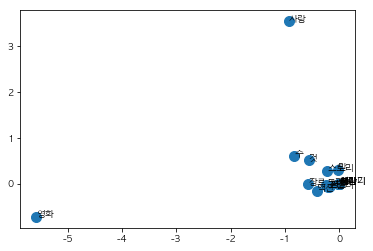

In [295]:
flg, ax = plt.subplots()
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
ax.scatter(w_x, w_y, s=100)
for i, txt in enumerate(corpus.keys()):
    ax.annotate(txt, (w_x[i], w_y[i]), fontsize = 9)

In [257]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  2.1.0
설치 위치:  /Users/sanghyub/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py
설정 위치:  /Users/sanghyub/.matplotlib
캐시 위치:  /Users/sanghyub/.matplotlib


In [258]:
print ('설정 파일 위치: ', mpl.matplotlib_fname())

설정 파일 위치:  /Users/sanghyub/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


In [285]:
import matplotlib.font_manager as fm

In [286]:
# OSX의 설치된 폰트를 가져오는 함수
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))

203


In [287]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))

203


In [291]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명 만 출력
f[:]

203


['STIXSizeFiveSym',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'cmtt10',
 'DejaVu Sans',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'cmmi10',
 'cmb10',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'cmex10',
 'cmss10',
 'STIXGeneral',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmr10',
 'cmsy10',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'BiauKai',
 'System Font',
 'Wingdings',
 'Trebuchet MS',
 'STIXSizeFourSym',
 'Diwan Thuluth',
 'STIXVariants',
 'Yuppy SC',
 'LingWai SC',
 '.SF NS Text Condensed',
 'LiSong Pro',
 'Courier New',
 'Toppan Bunkyu Midashi Mincho',
 '.SF Compact Text',
 '.SF Compact Rounded',
 'STIXIntegralsSm',
 'Lao Sangam MN',
 'STIXGeneral',
 '.SF Compa

In [289]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

In [290]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

font_list[:10] 

print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

plt.rcParams["font.family"] = 'AppleGothic'

print ('설정파일 위치: ', mpl.matplotlib_fname())

mpl.matplotlib_fname()

버전:  2.1.0
설치 위치:  /Users/sanghyub/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py
설정 위치:  /Users/sanghyub/.matplotlib
캐시 위치:  /Users/sanghyub/.matplotlib
# 설정 되어있는 폰트 사이즈
12.0
# 설정 되어있는 폰트 글꼴
['NanumGothic']
설정파일 위치:  /Users/sanghyub/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


'/Users/sanghyub/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

In [ ]:
dd